# Exploratory data analysis

## Imports

In [1]:
import scipy
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics import tsaplots

from utils import PROCESSED_DATA_DIR

pl.Config.set_tbl_rows(20)
pl.Config.set_fmt_table_cell_list_len(10)

polars.config.Config

## Data loading

In [2]:
train_df = pl.read_parquet(
    PROCESSED_DATA_DIR.joinpath('training', 'train_full.parquet')
)

train_df

carrier,flt_num,flt_departure_dt,observation_date,total_fare,days_till_flight,is_dst,route_id,flt_departure_local_time,flt_arrival_local_time,dur_min,tz_min,over_mn,dpt_4h_od,flt_count_dpt_24h,flt_count_dpt_4h,scaled_demand,scaled_share,origin_id,destination_id,flt_info_null
str,i64,date,date,i64,i16,i8,u8,datetime[ns],datetime[ns],i16,i16,i8,i8,u8,u8,i64,i64,u8,u8,u8
"""L2""",5242,2018-01-01,2017-11-27,846,35,0,4,2018-01-01 10:49:00,2018-01-01 12:14:00,85,-480,0,2,30,5,6659,212,3,4,0
"""OTH""",4790,2018-01-01,2017-11-27,937,35,0,4,2018-01-01 14:57:00,2018-01-01 16:17:00,80,-480,0,3,30,8,6659,316,3,4,0
"""OTH""",4837,2018-01-01,2017-11-27,281,35,0,6,2018-01-01 19:38:00,2018-01-01 20:43:00,65,-480,0,4,30,7,6659,316,4,3,0
"""L2""",5314,2018-01-01,2017-11-27,403,35,0,6,2018-01-01 19:05:00,2018-01-01 20:17:00,72,-480,0,4,30,7,6659,213,4,3,0
"""OTH""",6187,2018-01-01,2017-11-27,341,35,0,11,2018-01-01 20:30:00,2018-01-01 21:58:00,88,-480,0,5,21,5,6579,354,7,3,0
"""U1""",4771,2018-01-01,2017-11-27,513,35,0,4,null,null,null,null,null,null,null,null,null,null,3,4,1
"""L3""",15130,2018-01-01,2017-11-27,1298,35,0,4,2018-01-01 16:53:00,2018-01-01 18:19:00,86,-480,0,4,30,7,6659,231,3,4,0
"""L1""",1396,2018-01-01,2017-11-27,372,35,0,11,2018-01-01 19:35:00,2018-01-01 21:08:00,93,-480,0,4,21,7,6579,262,7,3,0
"""L1""",6316,2018-01-01,2017-11-27,1119,35,0,1,2018-01-01 12:31:00,2018-01-01 15:55:00,204,-300,0,3,5,2,1468,360,1,5,0


In [3]:
test_df = pl.read_parquet(
    PROCESSED_DATA_DIR.joinpath('test', 'test_full.parquet')
)

test_df

carrier,flt_num,flt_departure_dt,observation_date,days_till_flight,is_dst,route_id,flt_departure_local_time,flt_arrival_local_time,dur_min,tz_min,over_mn,dpt_4h_od,flt_count_dpt_24h,flt_count_dpt_4h,scaled_demand,scaled_share,origin_id,destination_id,flt_info_null
str,i64,date,date,i16,i8,u8,datetime[ns],datetime[ns],i16,i16,i8,i8,u8,u8,i64,i64,u8,u8,u8
"""L2""",7465,2019-01-01,2018-11-27,35,0,9,2019-01-01 08:04:00,2019-01-01 10:49:00,165,-360,0,2,7,2,null,null,5,6,0
"""L2""",7067,2019-01-01,2018-11-27,35,0,9,2019-01-01 13:17:00,2019-01-01 16:00:00,163,-360,0,3,7,2,null,null,5,6,0
"""L2""",1232,2019-01-01,2018-11-27,35,0,9,2019-01-01 18:40:00,2019-01-01 21:25:00,165,-360,0,4,7,2,null,null,5,6,0
"""U3""",752,2019-01-01,2018-11-27,35,0,7,2019-01-01 08:45:00,2019-01-01 10:07:00,82,-360,0,2,9,3,null,null,5,0,0
"""L1""",5135,2019-01-01,2018-11-27,35,0,7,2019-01-01 07:25:00,2019-01-01 08:42:00,77,-360,0,1,9,2,null,null,5,0,0
"""L1""",10966,2019-01-01,2018-11-27,35,0,7,2019-01-01 11:54:00,2019-01-01 13:18:00,84,-360,0,2,9,3,null,null,5,0,0
"""L1""",2181,2019-01-01,2018-11-27,35,0,7,2019-01-01 15:34:00,2019-01-01 16:51:00,77,-360,0,3,9,2,null,null,5,0,0
"""L1""",2724,2019-01-01,2018-11-27,35,0,8,2019-01-01 06:00:00,2019-01-01 10:30:00,270,-360,0,1,5,2,null,null,5,1,0
"""L3""",18075,2019-01-01,2018-11-27,35,0,4,2019-01-01 15:10:00,2019-01-01 16:30:00,80,-480,0,3,32,9,null,null,3,4,0


In [4]:
routes_df = pl.read_parquet(
    PROCESSED_DATA_DIR.joinpath('routes.parquet')
)

routes_df

route_id,origin,destination
u8,str,str
0,"""Airport17""","""Airport4"""
1,"""Airport20""","""Airport4"""
2,"""Airport26""","""Airport30"""
3,"""Airport30""","""Airport26"""
4,"""Airport30""","""Airport31"""
5,"""Airport30""","""Airport60"""
6,"""Airport31""","""Airport30"""
7,"""Airport4""","""Airport17"""
8,"""Airport4""","""Airport20"""


## Routes

### Count of outbound routes

In [5]:
routes_df.group_by('origin').len()

origin,len
str,u32
"""Airport30""",3
"""Airport43""",1
"""Airport17""",1
"""Airport60""",1
"""Airport31""",1
"""Airport4""",3
"""Airport20""",1
"""Airport26""",1


### Count of inbound routes

In [6]:
routes_df.group_by('destination').len()

destination,len
str,u32
"""Airport20""",1
"""Airport4""",3
"""Airport43""",1
"""Airport31""",1
"""Airport26""",1
"""Airport17""",1
"""Airport30""",3
"""Airport60""",1


### Carriers for each route

In [7]:
train_df.group_by('route_id').agg(
    pl.col('carrier').unique(),
    pl.col('carrier').n_unique().alias('count')
).join(
    routes_df,
    on = "route_id",
    how = "left"
).sort('count')

route_id,carrier,count,origin,destination
u8,list[str],u32,str,str
1,"[""L1""]",1,"""Airport20""","""Airport4"""
8,"[""L1""]",1,"""Airport4""","""Airport20"""
0,"[""U3"", ""L1""]",2,"""Airport17""","""Airport4"""
9,"[""L2"", ""L1""]",2,"""Airport4""","""Airport43"""
7,"[""L1"", ""U3""]",2,"""Airport4""","""Airport17"""
10,"[""L2"", ""L1""]",2,"""Airport43""","""Airport4"""
3,"[""L1"", ""U3"", ""OTH""]",3,"""Airport30""","""Airport26"""
2,"[""OTH"", ""L1"", ""U3""]",3,"""Airport26""","""Airport30"""
11,"[""OTH"", ""U3"", ""L1"", ""U1""]",4,"""Airport60""","""Airport30"""


## Fare

### Overall diistribution

In [8]:
train_df['total_fare'].describe()

statistic,value
str,f64
"""count""",1.698818e6
"""null_count""",0.0
"""mean""",710.461822
"""std""",543.207638
"""min""",234.0
"""25%""",395.0
"""50%""",552.0
"""75%""",825.0
"""max""",7859.0


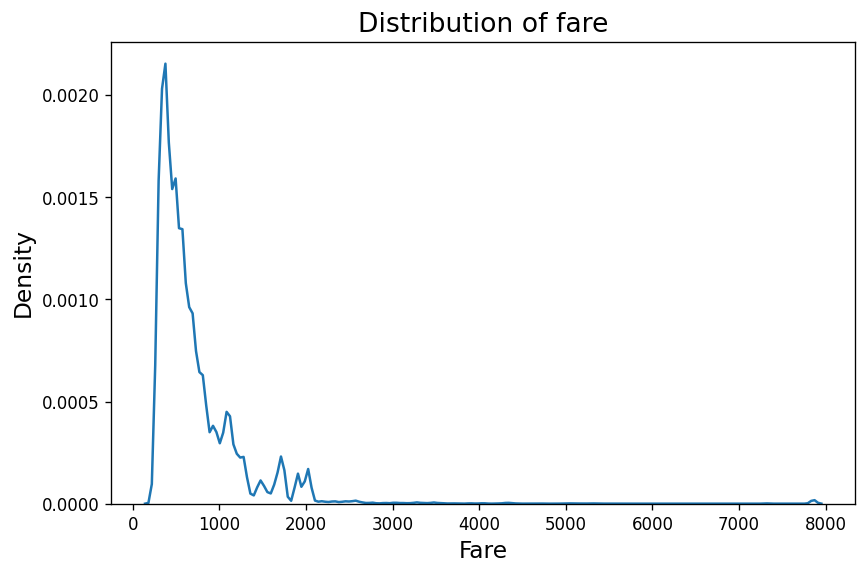

In [9]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.kdeplot(train_df['total_fare'])
plt.title("Distribution of fare", fontsize = 16)
plt.xlabel("Fare", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.show()

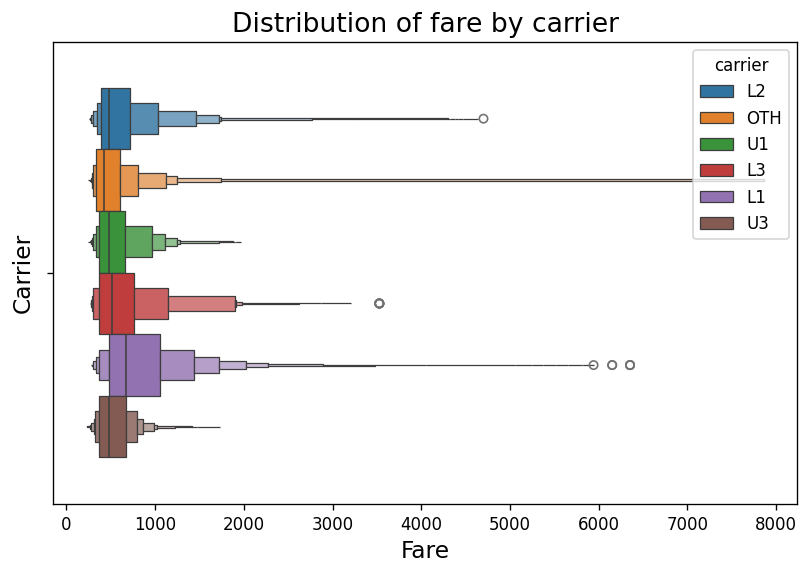

In [10]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.boxenplot(data = train_df, x = "total_fare", hue = "carrier")
plt.title("Distribution of fare by carrier", fontsize = 16)
plt.xlabel("Fare", fontsize = 14)
plt.ylabel("Carrier", fontsize = 14)
plt.show()

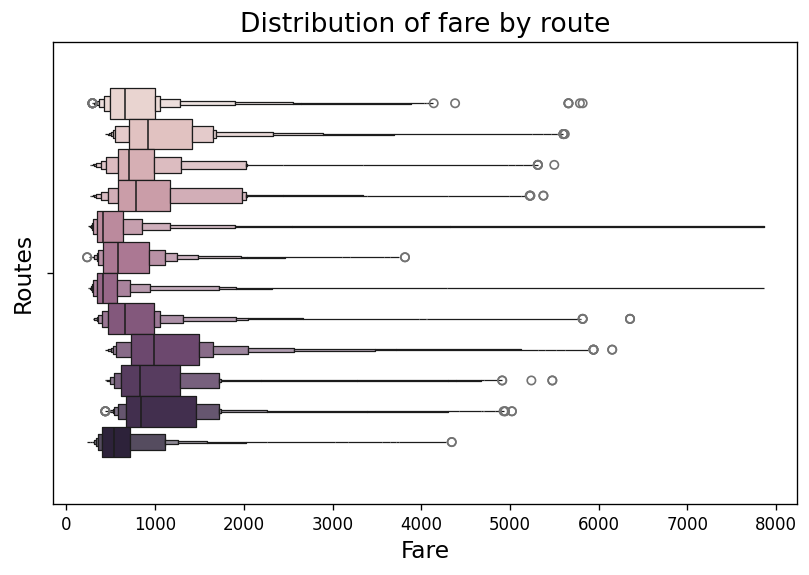

In [11]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.boxenplot(data = train_df, x = "total_fare", hue = "route_id")
plt.title("Distribution of fare by route", fontsize = 16)
plt.xlabel("Fare", fontsize = 14)
plt.ylabel("Routes", fontsize = 14)
plt.gca().get_legend().remove()
plt.show()

### Rescaling

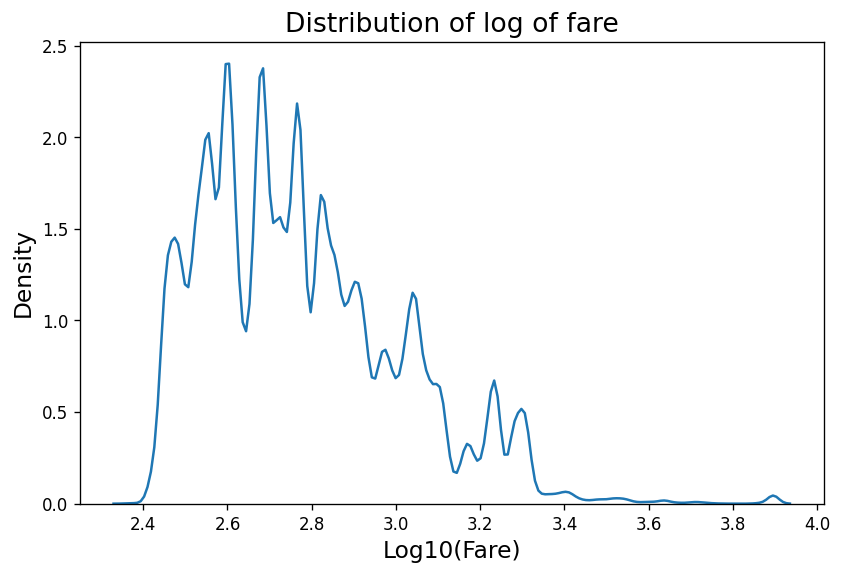

In [12]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.kdeplot(train_df['total_fare'].log10())
plt.title("Distribution of log of fare", fontsize = 16)
plt.xlabel("Log10(Fare)", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.show()

In [13]:
base_log10_fares = train_df.group_by('route_id', 'carrier').agg(
    pl.col('total_fare').log10().mean().alias('base_fare')
).sort('route_id', 'carrier')

base_log10_fares

route_id,carrier,base_fare
u8,str,f64
0,"""L1""",2.871843
0,"""U3""",2.723962
1,"""L1""",2.98998
2,"""L1""",2.93557
2,"""OTH""",2.765193
2,"""U3""",2.701619
3,"""L1""",2.967345
3,"""OTH""",2.768284
3,"""U3""",2.808008


In [14]:
train_df = train_df.join(
    base_log10_fares,
    on = ['route_id', 'carrier'],
    how = 'left'
).with_columns(
    pl.col('total_fare').log10().alias('log_fare')
).with_columns(
    (
        (pl.col('log_fare') - pl.col('base_fare')) / pl.col('base_fare')
    ).round(4).alias('scaled_fare')
)

train_df['scaled_fare'].describe()

statistic,value
str,f64
"""count""",1.698818e6
"""null_count""",0.0
"""mean""",-0.000002
"""std""",0.071659
"""min""",-0.1667
"""25%""",-0.0522
"""50%""",-0.0144
"""75%""",0.041
"""max""",0.4915


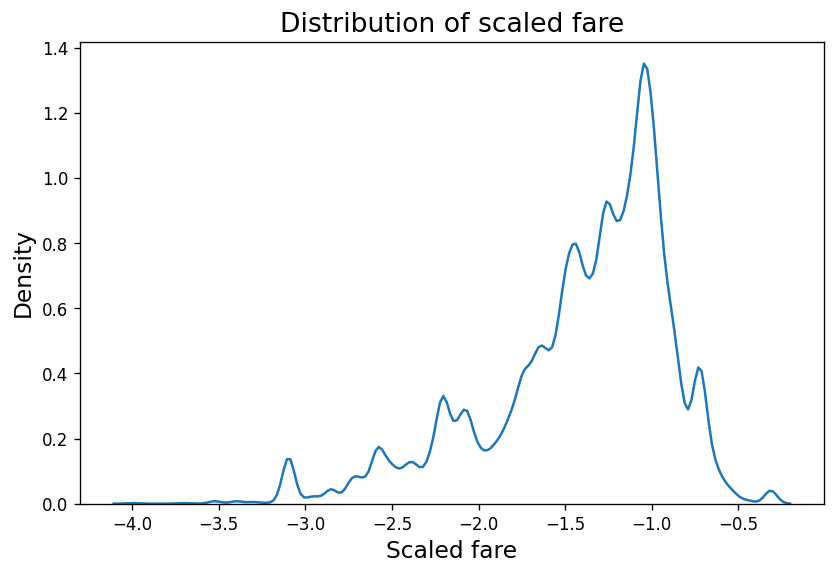

In [15]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.kdeplot(train_df['scaled_fare'].log10())
plt.title("Distribution of scaled fare", fontsize = 16)
plt.xlabel("Scaled fare", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.show()

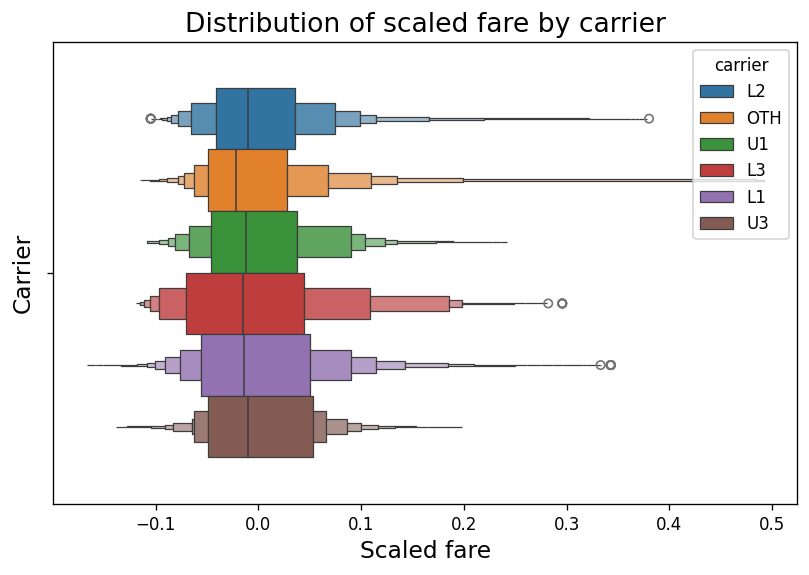

In [16]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.boxenplot(data = train_df, x = "scaled_fare", hue = "carrier")
plt.title("Distribution of scaled fare by carrier", fontsize = 16)
plt.xlabel("Scaled fare", fontsize = 14)
plt.ylabel("Carrier", fontsize = 14)
plt.show()

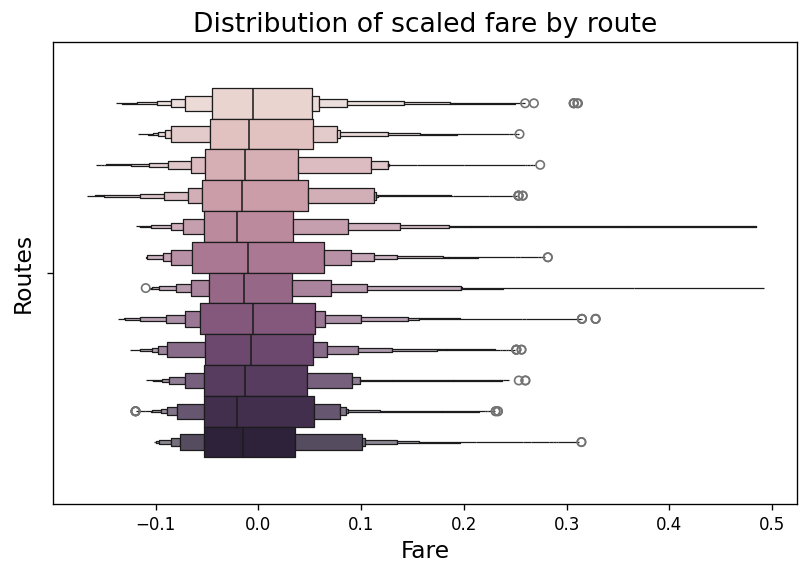

In [17]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.boxenplot(data = train_df, x = "scaled_fare", hue = "route_id")
plt.title("Distribution of scaled fare by route", fontsize = 16)
plt.xlabel("Fare", fontsize = 14)
plt.ylabel("Routes", fontsize = 14)
plt.gca().get_legend().remove()
plt.show()

### Daily mean prices

In [18]:
daily_mean_prices = train_df.group_by('flt_departure_dt').agg(
    pl.col('total_fare').mean()
).sort('flt_departure_dt')

daily_mean_prices

flt_departure_dt,total_fare
date,f64
2018-01-01,691.696695
2018-01-02,725.081633
2018-01-03,632.100858
2018-01-04,528.261882
2018-01-05,611.255836
2018-01-06,685.580913
2018-01-07,828.574823
2018-01-08,878.6638
2018-01-09,772.901289


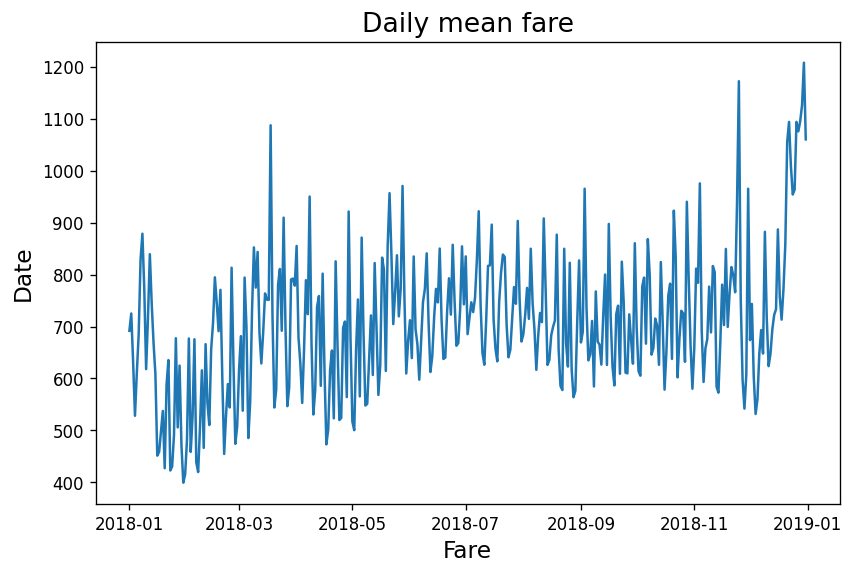

In [19]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.lineplot(
    data = daily_mean_prices, 
    x = "flt_departure_dt", 
    y = "total_fare"
)

plt.title("Daily mean fare", fontsize = 16)
plt.xlabel("Fare", fontsize = 14)
plt.ylabel("Date", fontsize = 14)

plt.show()

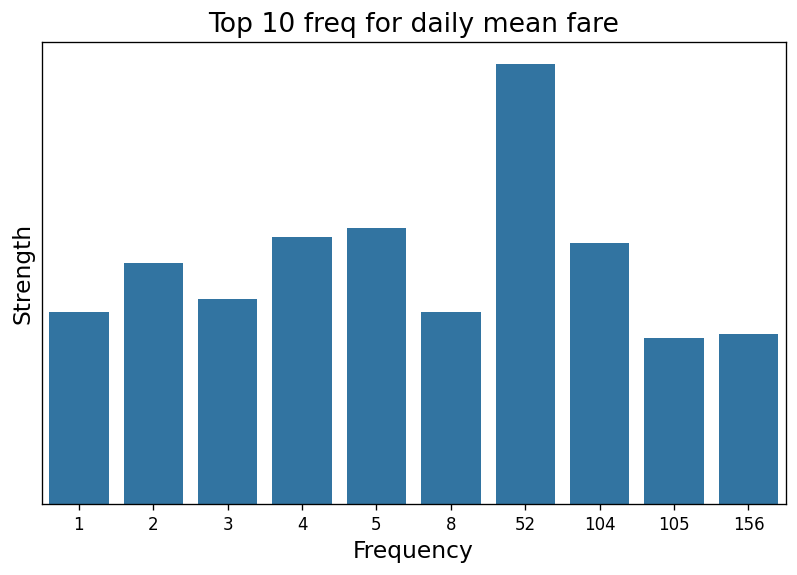

In [20]:
def get_top_frequencies(signal, freq_count = 10):
    signal = signal - signal.mean()

    rfft = np.abs(
        scipy.fft.rfft(signal)
    )
    rfft_freq = scipy.fft.rfftfreq(signal.size, 1 / signal.size)

    top_freq = rfft.argsort()[-freq_count::][::-1]

    return rfft[top_freq], rfft_freq[top_freq]

rfft, rfft_freq = get_top_frequencies(daily_mean_prices['total_fare'].to_numpy())

plt.figure(figsize = (8, 5), dpi = 120)
sns.barplot(
    x = rfft_freq.astype(int),
    y = rfft
)
plt.title("Top 10 freq for daily mean fare", fontsize = 16)
plt.xlabel("Frequency", fontsize = 14)
plt.ylabel("Strength", fontsize = 14)
plt.yticks([])
plt.show()

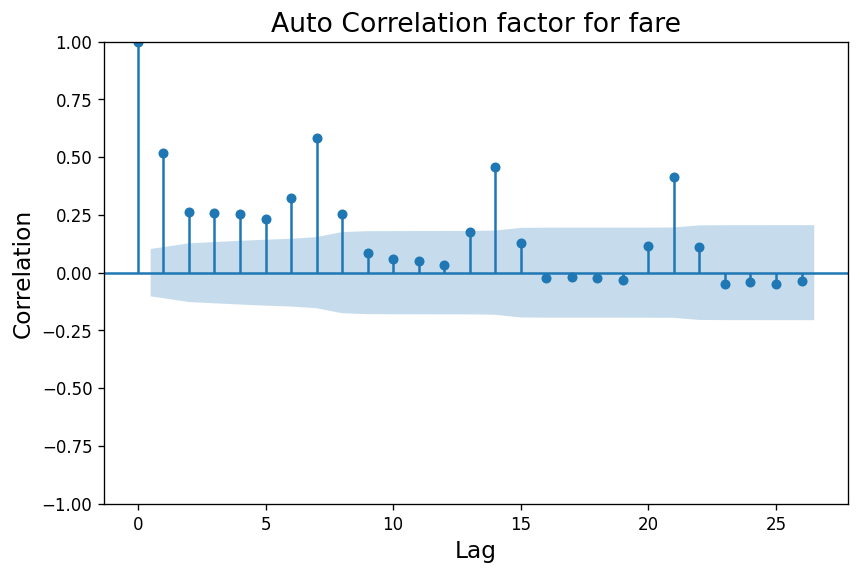

In [21]:
plt.figure(figsize = (8, 5), dpi = 120)
tsaplots.plot_acf(
    daily_mean_prices['total_fare'].to_numpy(), 
    ax = plt.gca()
)
plt.title("Auto Correlation factor for fare", fontsize = 16)
plt.xlabel("Lag", fontsize = 14)
plt.ylabel("Correlation", fontsize = 14)
plt.show()

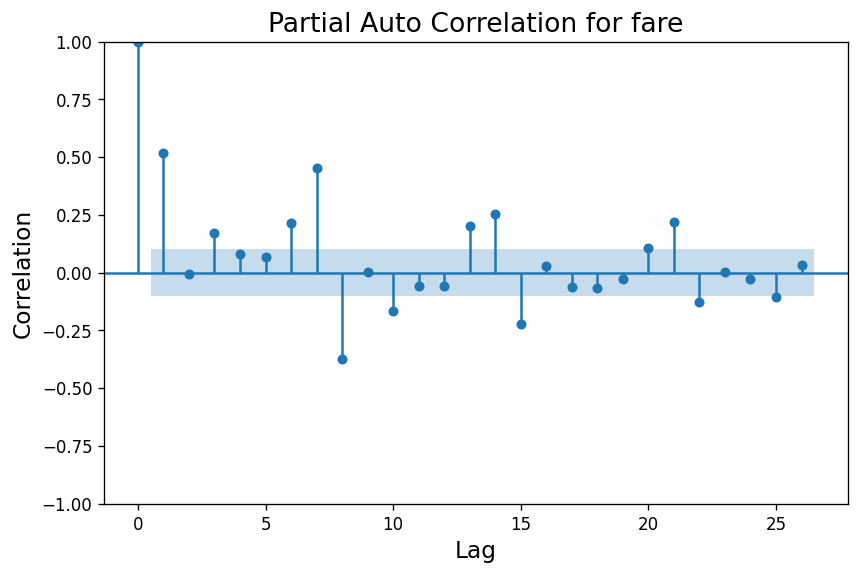

In [22]:
plt.figure(figsize = (8, 5), dpi = 120)
tsaplots.plot_pacf(
    daily_mean_prices['total_fare'].to_numpy(), 
    ax = plt.gca()
)
plt.title("Partial Auto Correlation for fare", fontsize = 16)
plt.xlabel("Lag", fontsize = 14)
plt.ylabel("Correlation", fontsize = 14)
plt.show()

## Flight Counts

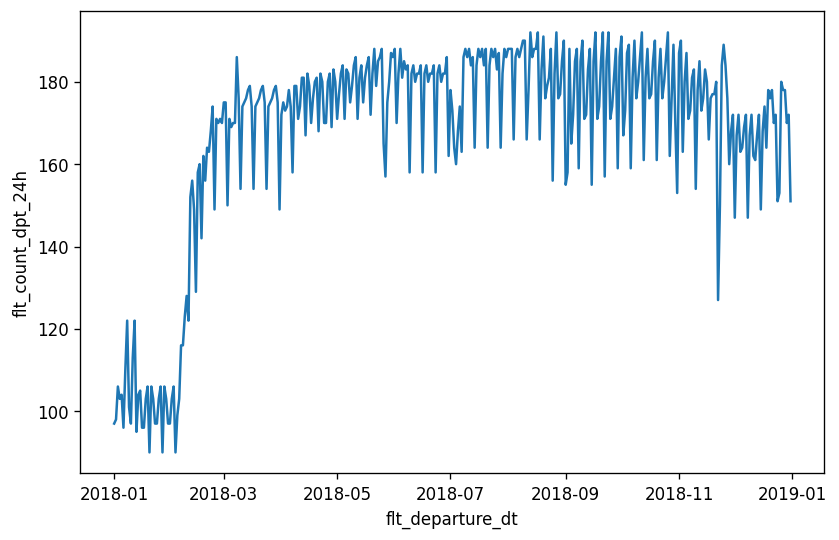

In [23]:
plt.figure(figsize = (8, 5), dpi = 120)
sns.lineplot(
    data = train_df.filter(
        pl.col('flt_count_dpt_24h').is_not_null()
    ).group_by(
        'flt_departure_dt', 'route_id'
    ).first().group_by(
        'flt_departure_dt'
    ).agg(
        pl.col('flt_count_dpt_24h').sum()
    ), 
    x = "flt_departure_dt", 
    y = "flt_count_dpt_24h"
)

plt.show()

In [24]:
train_df.filter(
    pl.col('flt_count_dpt_24h').is_not_null()
).group_by('flt_departure_dt', 'route_id').first().group_by(
    'flt_departure_dt'
).agg(
    pl.col('flt_count_dpt_24h').sum()
)

flt_departure_dt,flt_count_dpt_24h
date,i64
2018-11-02,190
2018-02-10,122
2018-11-23,150
2018-02-19,156
2018-06-15,184
2018-07-09,188
2018-11-11,178
2018-02-16,160
2018-02-25,171


In [25]:
train_df.filter(
    pl.col('tz_min').is_not_null()
).group_by('origin_id', 'is_dst').agg(pl.col('tz_min').unique())

origin_id,is_dst,tz_min
u8,i8,list[i16]
2,1,[-300]
1,0,[-300]
4,0,"[-480, -420]"
1,1,[-240]
2,0,"[-360, -300]"
6,1,[-300]
7,0,[-480]
3,0,"[-480, -420]"
0,0,[-420]
